<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/Fellowship_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Objective**

The goal is to develop a sentiment analysis model that accurately classifies movie reviews as positive or negative using machine learning.**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load Dataset
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:

# Reading the CSV file
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

# Display the first few rows of the dataset
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Data contains html tags, quotation marks etc that should be cleaned

In [4]:
# Display general information about the DataFrame
print("General Info:")
print(df.info())

General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
review       0
sentiment    0
dtype: int64


There are no missing values

In [6]:
# Check for unique values in the sentiment column
print("\nUnique Values in 'sentiment' Column:")
print(df['sentiment'].unique())


Unique Values in 'sentiment' Column:
['positive' 'negative']


In [7]:
# Display value counts of 'sentiment'
print("\nSentiment Value Counts:")
print(df['sentiment'].value_counts())


Sentiment Value Counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


This is a balanced dataset

### **Data Cleaning**

In [8]:
# Clean the data

# Lowercase the text
df['review'] = df['review'].str.lower()

# Remove HTML tags
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['review'] = df['review'].apply(remove_html_tags)

# Remove special characters and punctuation
def remove_special_chars(text):
  text = re.sub('[^a-zA-Z0-9\s]', '', text)
  return text

df['review'] = df['review'].apply(remove_special_chars)


# Remove extra whitespace
df['review'] = df['review'].str.strip()


def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['review'] = df['review'].apply(remove_urls)

print("\nCleaned Dataset:")
print(df.head())


Cleaned Dataset:
                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the filming tech...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive


In [9]:
# Check for duplicates

# Find duplicate rows based on the 'review' column
duplicate_rows = df[df.duplicated(subset=['review'], keep=False)]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Count the number of duplicate reviews
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate reviews: {num_duplicates}")


Duplicate Rows:
                                                  review sentiment
42     of all the films i have seen this one the rage...  negative
84     we brought this film as a joke for a friend an...  negative
140    before i begin let me get something off my che...  negative
219    ed wood rides again the fact that this movie w...  negative
245    i have seen this film at least 100 times and i...  positive
...                                                  ...       ...
49912  this is an incredible piece of drama and power...  positive
49950  this was a very brief episode that appeared in...  negative
49984  hello it is i derrick cannon and i welcome you...  negative
49986  this movie is a disgrace to the major league f...  negative
49991  les visiteurs the first movie about the mediev...  negative

[828 rows x 2 columns]

Number of duplicate reviews: 828


In [10]:
# Drop duplicate rows

# Drop duplicate rows based on the 'review' column, keeping the first occurrence
df = df.drop_duplicates(subset=['review'], keep='first')

# Verify that duplicates have been removed
print("\nNumber of rows after removing duplicates:", len(df))

# Display the first few rows of the updated dataset to confirm the changes
print("\nUpdated Dataset:")
df.head()



Number of rows after removing duplicates: 49580

Updated Dataset:


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


### **Data Visualization**

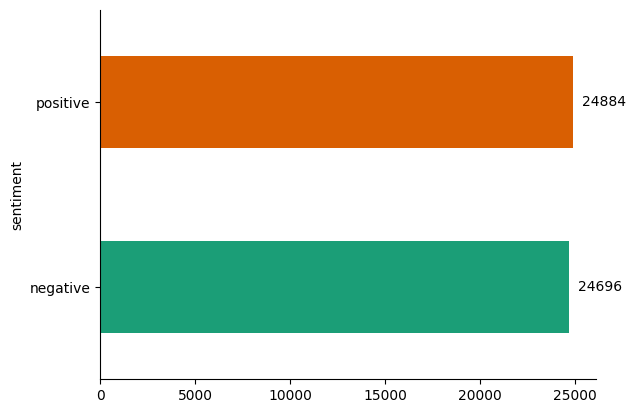

In [11]:
# Plotting bar chart
ax = df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding counts to the bars
for i, v in enumerate(df.groupby('sentiment').size()):
    plt.text(v + 500, i, str(v), va='center')

plt.show()

Both sentiments appear to be  closely equally distributed with positive sentiments slighly higher

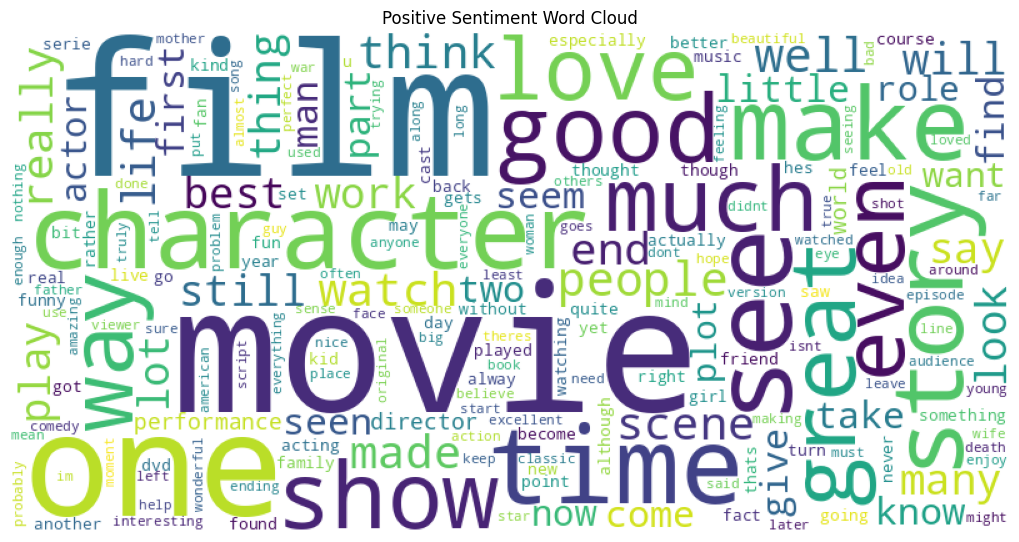

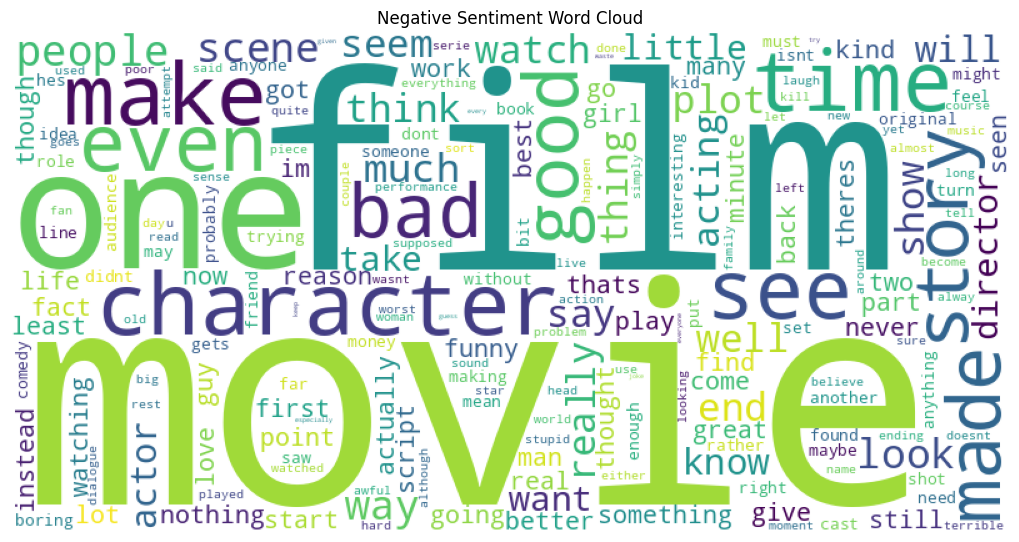

In [12]:
# Ensure that DataFrame columns are correctly referenced
# Check for missing or empty values in the 'review' and 'sentiment' columns
df = df.dropna(subset=['review', 'sentiment'])

# Convert sentiment column to numerical labels using map

df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['review'].astype(str)
negative_reviews = df[df['sentiment'] == 0]['review'].astype(str)

# Combine reviews into single strings
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Handle case where text might be empty
if positive_text.strip():
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 8), facecolor=None)
    plt.imshow(positive_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title("Positive Sentiment Word Cloud")
    plt.show()
else:
    print("No positive reviews available for word cloud generation.")

if negative_text.strip():
    negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.figure(figsize=(10, 8), facecolor=None)
    plt.imshow(negative_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title("Negative Sentiment Word Cloud")
    plt.show()
else:
    print("No negative reviews available for word cloud generation.")

.

### **Model Developmennt Using Logistic Regression, XGBoost, Deep Learning (RNN / LSTM)**

**Logistic Regression**

Accuracy: 0.8898749495764421
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4925
           1       0.88      0.90      0.89      4991

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



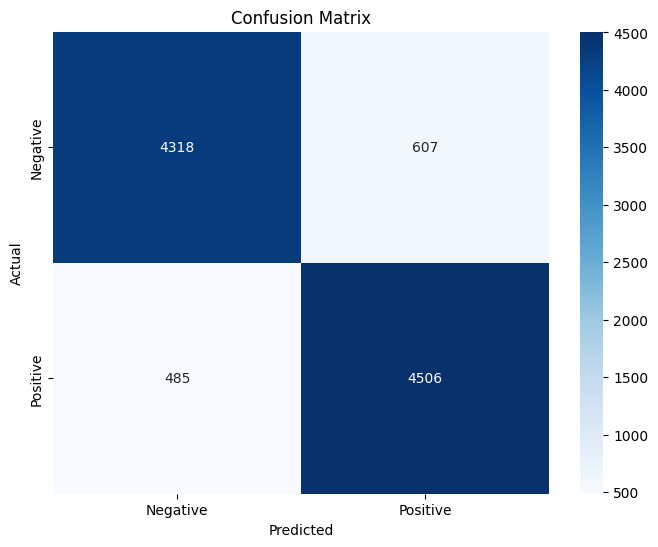

In [13]:
# perform sentiment analysis using logistic regression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Interpretations**

**Accuracy**: 88.98% — The Logistics Regression (LR) model correctly predicted sentiment in nearly 89% of cases.

**Precision:** 90% for negative and 88% for positive, indicating good reliability for both classes.

**Recall**: 88% for negative and 90% for positive, showing balanced detection rates.

**F1-Score:** Both classes scored 0.89, reflecting consistent prediction performance.

**Confusion Matrix Insights:**

True Negatives (4318), False Positives (607)
False Negatives (485), True Positives (4506)

**Key Takeaway:** The model shows strong, balanced performance with minimal misclassifications, suitable for sentiment analysis tasks.


### **XGBoost**

Accuracy: 0.8579064138765631
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4925
           1       0.84      0.88      0.86      4991

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



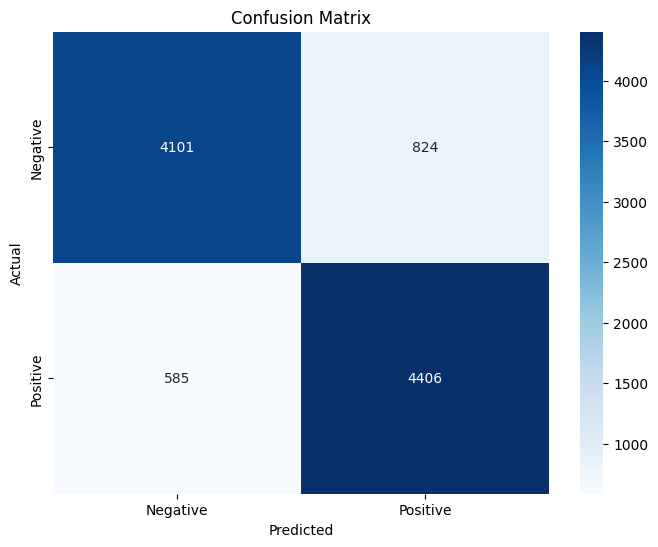

In [14]:
# Use Xgboost to Perform Sentiment Analysis

!pip install xgboost

import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42) # Use binary:logistic for binary classification
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Interpretations**

**Accuracy:** 85.79% — The Extreme Gradient Boosting (XGBoost) model correctly predicted sentiment in nearly 86% of cases.

**Precision:** 88% for negative and 84% for positive, indicating good reliability for both classes.

**Recall:** 83% for negative and 88% for positive, showing balanced detection rates.

**F1-Score**: 0.85 for negative and 0.86 for positive, reflecting consistent prediction performance.

**Confusion Matrix Insights:**

True Negatives: 4101

False Positives: 824

False Negatives: 585

True Positives: 4406

**Key Takeaway:** The model demonstrates strong, balanced performance, but reducing misclassifications can further enhance accuracy.

### **Deep Learning Technique - Tensorflow / Keras with LSTM**

Epoch 1/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 141s 248ms/step - accuracy: 0.7580 - loss: 0.4787 - val_accuracy: 0.8452 - val_loss: 0.3625
Epoch 2/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 143s 256ms/step - accuracy: 0.9075 - loss: 0.2368 - val_accuracy: 0.8830 - val_loss: 0.3002
Epoch 3/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 196s 246ms/step - accuracy: 0.9362 - loss: 0.1703 - val_accuracy: 0.8828 - val_loss: 0.3093
Epoch 4/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 137s 246ms/step - accuracy: 0.9543 - loss: 0.1249 - val_accuracy: 0.8795 - val_loss: 0.3906
Epoch 5/20
558/558 ━━━━━━━━━━━━━━━━━━━━ 142s 245ms/step - accuracy: 0.9637 - loss: 0.1014 - val_accuracy: 0.8621 - val_loss: 0.3852


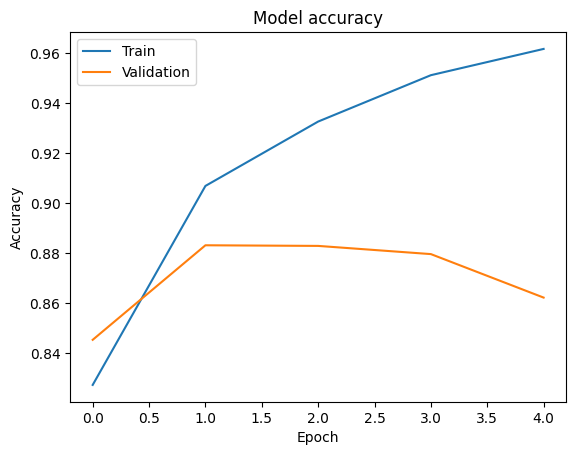

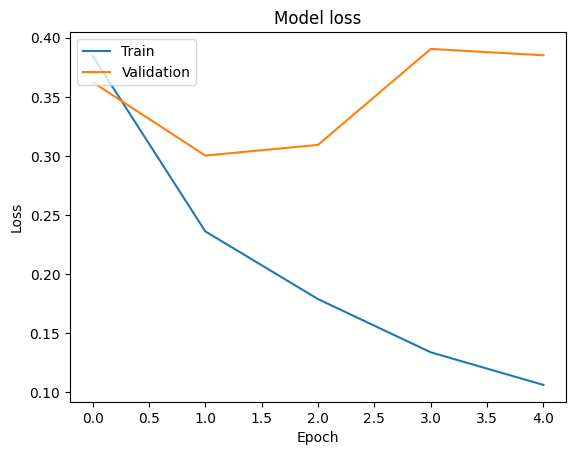

310/310 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8816 - loss: 0.2994
Test Loss: 0.2987396717071533
Test Accuracy: 0.8840258121490479


In [15]:
# Import the Tokenizer class from tensorflow.keras.preprocessing.text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# Tokenize text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words) # Now Tokenizer is defined
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_sequence_length = 200
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the model
model = keras.Sequential([
    keras.layers.Embedding(max_words, 128, input_length=max_sequence_length),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)


# Train the model with early stopping and assign the result to 'history'
history = model.fit( # Assign the output of model.fit to the variable 'history'
    X_train_padded,
    y_train,
    epochs=20,  # Increased epochs, early stopping will prevent overfitting
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping] # add early stopping callback
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1. **Accuracy Analysis:**
The training accuracy steadily increased and reached over 94%, while validation accuracy stabilized around 88% after three epochs.
The test set accuracy is ~87.96%, indicating that the model performs well on unseen data.

2. **Loss Analysis:**
Training loss decreased significantly, indicating the model's improvement in fitting the training data.
Validation loss plateaued, showing that early stopping effectively prevented overfitting.
Test loss (~0.299) confirms the model generalizes reasonably well.

3. **Insights
Generalization**: With a test accuracy close to validation accuracy, the model generalizes well to new movie reviews.
Early Stopping Success: Preventing overfitting by monitoring validation loss ensured better test performance.

**Conclusion**

The LSTM model successfully captures sequential patterns in text, providing a reliable sentiment analysis solution. The results demonstrate a robust and well-generalized performance suitable for practical applications.

.

### **Models Comparison LR, XGBoost, LSTM**

**Best Model Selection**

**Best Overall:** Logistic Regression outperformed both models with the highest accuracy (88.98%), superior precision, and balanced F1-scores for both classes.

**Efficiency:** Logistic Regression is computationally lightweight compared to the computational cost of RNN-LSTM and XGBoost.

**XGBoost:** Slightly lower performance but may be better suited for structured/tabular data tasks.

**RNN-LSTM:** Reasonably strong accuracy but resource-heavy; best suited for scenarios emphasizing temporal dependencies in long texts.